In [3]:
from xml.etree.ElementTree import Element, SubElement, dump

note = Element("note")
to = Element("to")
to.text = "Andrew"

note.append(to)

dump(note)

<note><to>Andrew</to></note>


In [4]:
from xml.etree.ElementTree import Element, SubElement, dump

note = Element("note")
to = Element("to")
to.text = "Andrew"

note.append(to)
SubElement(note, "from").text = "You"

dump(note)

<note><to>Andrew</to><from>You</from></note>


In [7]:
dummy1 = Element("document")
note.insert(1, dummy1)
dummy2 = Element("News")
note.insert(2, dummy2)
dump(note)
note.remove(dummy1)
print()
dump(note)

<note date="20190114"><to>Andrew</to><document /><News /><document /><News /><from>You</from></note>

<note date="20190114"><to>Andrew</to><News /><document /><News /><from>You</from></note>


In [27]:
from xml.etree.ElementTree import Element, SubElement, dump

note = Element("note")
to = Element("to")
to.text = "Andrew"

note.append(to)
SubElement(note, "from").text = "You"
note.attrib["date"] = "20190114"

dump(note)

<note date="20190114"><to>Andrew</to><from>You</from></note>


In [28]:
from xml.etree.ElementTree import Element, SubElement, dump

note = Element("note")
note.attrib["date"] = "20190114"

to = Element("to")
to.text = "Andrew"
note.append(to)

SubElement(note, "from").text = "You"
SubElement(note, "heading").text = "Hello"
SubElement(note, "body").text = "Well come to my class"
dump(note)

<note date="20190114"><to>Andrew</to><from>You</from><heading>Hello</heading><body>Well come to my class</body></note>


In [29]:
def indent(elem, level=0):
    i = "/n" + level*" "
    if len(elem):
        if not elem.text or not elem.text.strip():
            elem.text = i + " "
            for elem in elem:
                indent(elem, level+1)
                if not elem.tail or not elem.tail.strip():
                    elem.tail = i
    else:
        if level and (not elem.tail or not elem.tail.strip()):
            elem.tail = i

In [30]:
indent(note)
dump(note)

<note date="20190114">/n <to>Andrew</to>/n <from>You</from>/n <heading>Hello</heading>/n <body>Well come to my class</body>/n </note>


In [31]:
from xml.etree.ElementTree import ElementTree

ElementTree(note).write("CSLEE.xml")

from xml.etree.ElementTree import parse

tree = parse("CSLEE.xml")

note = tree.getroot()

In [32]:
dump(note)

<note date="20190114">/n <to>Andrew</to>/n <from>You</from>/n <heading>Hello</heading>/n <body>Well come to my class</body>/n </note>


In [33]:
print(note.get("date"))
print(note.get("foo", "default"))
print(note.keys())
print(note.items())

20190114
default
['date']
[('date', '20190114')]


In [34]:
from_tag = note.find("from")
from_tags = note.findall("from")
from_text = note.findtext("from")
print(from_tag)
print(from_tags)
print(from_text)

<Element 'from' at 0x000001CC3419F4A8>
[<Element 'from' at 0x000001CC3419F4A8>]
You


### RSS

In [44]:
from bs4 import BeautifulSoup
import urllib.request
import urllib.parse
import xml.etree.ElementTree as ET

def xml_crawling(url):
    with urllib.request.urlopen(url) as response:
        xml = response.read()
        soup = BeautifulSoup(xml, 'xml')
        soup_total = string_to_xml(str(soup))
    return soup_total

def fillter(text):
    return text.replace('\ufeff', '').replace('&nbsp', '')

def string_to_xml(text):
    del_text = "<img src='"
    root = ET.fromstring(text)
    result = []
    for n in root.findall('channel'):
        for j in n.findall('item'):
            if del_text == str(j.find('description').text)[:10]:
                result.append([str(j.find('pubDate').text),
                              str(j.find('title').text),
                               str(j.find('link').text),
                              fillter(str(j.find('description').text)[124:])])
            else:
                result.append([str(j.find('pubDate').text),
                              str(j.find('title').text),
                               str(j.find('link').text),
                              fillter(str(j.find('description').text))])
                print()
    return result

test = xml_crawling("http://rss.donga.com/total.xml")
test

[['Tue, 15 Jan 2019 13:42:00 +0900',
  '박성광, 외설 포장마차 시비에 답하다 “2월 영업 종료”',
  'http://news.donga.com/list/3/all/20190115/93709590/1',
  '개그맨 박성광(38) 측이 ‘포차 논란’에 답했다. 소속사 SM C&amp;C는 “2년 전 박성광은 지인이 제안한 사업 ‘박성광의 풍기물란’에 자신의 성명권 사용을 허락했다. 박성광은 홍보에 한해 운영에만 참여했고, 지인은 사업체 기획과 실질적인 경영을 담당했다”며 “해당 가게는 작년 12월 영업 종료를 결정했고, 정리 수순을 거쳐 2월 최종 종료된다”고 15일 전했다.  “박성광은 자신의 이름을 건 가게를 신중히 살피지 못한 것에 책임감을 느낀다”면서 “해당 사안들로 불편함을 느낀 분들에게 진심으로 고개 숙여 사죄한다. 해당 사안이 조속히 마무리될 수 있도록 노력하겠다”고 덧붙였다.‘박성광의 풍기물란’은 네온사인과 메뉴판으로 도마 위에 올랐다. 점포 인테리어로 사용된 네온사인은 ‘풍만한 여자, 기여운 여자도 물론 좋지만, 란(난) 니가 젤 좋아’라며 빛을 발하고 있다.    메뉴판은 컴퓨터 폴더 이미지 안에 ‘야동파일 형식’으로 꾸며졌다. ‘먹는 즐거움에 보는 즐거움’이란 문구 밑에 ‘서양’ ‘일본’'],
 ['Tue, 15 Jan 2019 13:41:00 +0900',
  '음주운전 반성문 쓴 다음날 또 음주운전 40대 법정구속',
  'http://news.donga.com/list/3/all/20190115/93709570/1',
  ' 음주운전에 단속돼 경찰 조사를 받던 40대 남성이 반성문을 쓰고도 다시 술을 마시고 운전하다 실형을 선고받고 법정 구속됐다.     울산지법 형사4단독 이준영 판사는 도로교통법 위반 혐의로 재판에 넘겨진 A씨(45)에게 징역 8개월을 선고했다고 15일 밝혔다.  A씨는 지난해 6월 6일 오후 9시 50분께 울산시 울주군 한 도로 200ｍ 구간에서 혈중알코올농도 0.124%(면허취소)

### API(네이버)

In [57]:
import os
import sys
import urllib.request

client_id = "fRMu4P1l4je0SnDmm6J1"
client_secret = "eTr7cfgDeK"
encText = urllib.parse.quote("손흥민")

url = "https://openapi.naver.com/v1/search/blog?query=" + encText + "&display=2" # json 결과 blog?query="  + encText, display 기본 10개
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과 blog.xml?query=" + encText

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id", client_id)
request.add_header("X-Naver-Client-Secret", client_secret)

response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
"lastBuildDate": "Tue, 15 Jan 2019 14:49:56 +0900",
"total": 198507,
"start": 1,
"display": 2,
"items": [
{
"title": "<b>손흥민</b>과 축구를?! SKT 5GX 기술로 구현하다.",
"link": "http://blog.naver.com/todshrck?Redirect=Log&amp;logNo=221442289621",
"description": "런던의 <b>손흥민</b>과 서울에서 축구를?! SKT 5GX 드림프로젝트에 담긴 5G 기술은? 지난해 12월 1일 이동통신... 바로 <b>손흥민</b> 선수가 등장하는 SKT 5GX 드림프로젝트 편인데요. 아직 못 보신 분들을 위해 영상을... ",
"bloggername": "망상K의 비주얼스펙트럼",
"bloggerlink": "http://blog.naver.com/todshrck",
"postdate": "20190115"

},
{
"title": "득점 기록으로 본 <b>손흥민</b>과 박지성의 '차이'",
"link": "http://blog.naver.com/gangaeto?Redirect=Log&amp;logNo=221433523981",
"description": "I <b>손흥민</b>이 대단한 득점행진을 이어가고 있습니다. <b>손흥민</b>의 득점 행진에 특별한 '데이터'가 있습니다. 이 '데이터'는 기존 한국 선수들과는 확연히 다른 <b>손흥민</b>만 갖고 있는 특징입니다. 최근 7골 기록을... ",
"bloggername": "광개토의 이야기가 있는 블로그",
"bloggerlink": "http://blog.naver.com/gangaeto",
"postdate": "20190104"

}
]
}



### 워드 클라우드

In [79]:
import math
import requests
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Twitter; tw = Twitter()

req = requests.get('https://sports.v.daum.net/v/20181224170910499')
soup = BeautifulSoup(req.content)
nouns = tw.nouns(soup.find('div', {'class': 'news_view'}).text)
cnouns = dict(Counter(nouns))

font_path = 'c:/Windows/Fonts/malgun.ttf'


wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800
).generate_from_frequencies(cnouns)



C:\Users\user\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
C:\Users\user\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\user\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


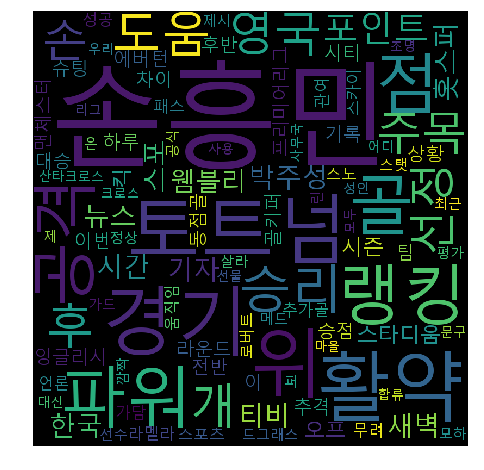

In [82]:
plt.imshow(wordcloud)
plt.rcParams['figure.figsize']=[5,5]
plt.axis("off")
plt.show()

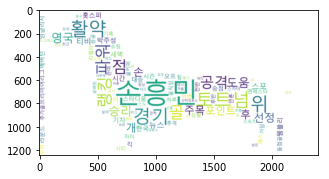

<Figure size 360x360 with 0 Axes>

In [101]:
from PIL import Image

mask_son = np.array(Image.open('./Dachshund.png'))
wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white",
    mask = mask_son
).generate_from_frequencies(cnouns)

wordcloud.to_file('./Dachshund_word_cloud.png')
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure()
plt.show()